# Import libraries

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [433]:
auto_price = pd.read_csv(r"D:\BOARD INFINITY\AutoData (1).csv")
auto_price.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#  Perform EDA on the data

In [434]:
auto_price.shape

(205, 25)

In [435]:
auto_price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [436]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [437]:
auto_price.describe(include=object)

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [438]:
auto_price.fueltype.value_counts(normalize=True)

gas       0.902439
diesel    0.097561
Name: fueltype, dtype: float64

In [439]:
auto_price['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [440]:
auto_price.select_dtypes(include=[np.float64])

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


In [441]:
auto_price.select_dtypes(include=[np.int64])

,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,3,2548,130,111,5000,21,27
1,3,2548,130,111,5000,21,27
2,1,2823,152,154,5000,19,26
3,2,2337,109,102,5500,24,30
4,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...
200,-1,2952,141,114,5400,23,28
201,-1,3049,141,160,5300,19,25
202,-1,3012,173,134,5500,18,23
203,-1,3217,145,106,4800,26,27


In [442]:
auto_price.select_dtypes(exclude=[np.number])

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [443]:
auto_price.groupby('fuelsystem').make.count().sort_values(ascending= False)

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: make, dtype: int64

In [450]:
auto_price['fueltype'].value_counts()

0    185
1     20
Name: fueltype, dtype: int64

In [451]:
auto_price['aspiration'].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [452]:
auto_price['doornumber'].value_counts()

1    115
0     90
Name: doornumber, dtype: int64

In [453]:
auto_price['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [454]:
auto_price['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [455]:
auto_price['enginelocation'].value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

# Perform data cleanup as required

In [444]:
uniq=['doornumber','aspiration','enginelocation','fueltype']
for i in uniq:
    print(str(i).upper())
    print(auto_price[i].unique())

DOORNUMBER
['two' 'four']
ASPIRATION
['std' 'turbo']
ENGINELOCATION
['front' 'rear']
FUELTYPE
['gas' 'diesel']


In [445]:
def _doornumber(x):
    return x.map({'two':0,'four':1})
auto_price[['doornumber']] = auto_price[['doornumber']].apply(_doornumber)


def _aspiration(x):
    return x.map({'std':0,'turbo':1})
auto_price[['aspiration']] =auto_price[['aspiration']].apply(_aspiration)


def _englocation(x):
    return x.map({'front':1,'rear':0})
auto_price[['enginelocation']] = auto_price[['enginelocation']].apply(_englocation)


def _fueltyp(x):
    return x.map({'gas':0,'diesel':1})
auto_price[['fueltype']] = auto_price[['fueltype']].apply(_fueltyp)

In [446]:
auto_price.describe(exclude=np.number)

,make,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205
unique,147,5,3,7,7,8
top,toyota corona,sedan,fwd,ohc,four,mpfi
freq,6,96,120,148,159,94


In [447]:
auto_price.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,0,0,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,0,0,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,0,0,0,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,0,0,1,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,0,0,1,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [448]:
auto_price[['brand','model']] = auto_price['make'].str.split(' ', n=1, expand=True)
auto_price.drop(['make'], axis = 1, inplace = True)
auto_price.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### We got some spelling mistakes in the data.

In [449]:
auto_price['brand'] = auto_price['brand'].str.replace('Nissan','nissan')

auto_price['brand'] = auto_price['brand'].str.replace('maxda','mazda')

auto_price['brand'] = auto_price['brand'].str.replace('porcshce','porsche')

auto_price['brand'] = auto_price['brand'].str.replace('toyouta','toyota')

auto_price['brand'] = auto_price['brand'].str.replace('vokswagen','volkswagen')
    
auto_price['brand'] = auto_price['brand'].str.replace('vw','volkswagen')
    

### We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.

# Pick the best variable for making a simple linear regression model

### Here we will identify if some predictors directly have a strong association with the outcome variable price

In [456]:
cols=auto_price.columns
num_cols=auto_price._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [457]:
auto_price[cat_cols]

,model,enginetype,drivewheel,brand,fuelsystem,carbody,cylindernumber
0,giulia,dohc,rwd,alfa-romero,mpfi,convertible,four
1,stelvio,dohc,rwd,alfa-romero,mpfi,convertible,four
2,Quadrifoglio,ohcv,rwd,alfa-romero,mpfi,hatchback,six
3,100 ls,ohc,fwd,audi,mpfi,sedan,four
4,100ls,ohc,4wd,audi,mpfi,sedan,five
...,...,...,...,...,...,...,...
200,145e (sw),ohc,rwd,volvo,mpfi,sedan,four
201,144ea,ohc,rwd,volvo,mpfi,sedan,four
202,244dl,ohcv,rwd,volvo,mpfi,sedan,six
203,246,ohc,rwd,volvo,idi,sedan,six


In [458]:
auto_price[num_cols]

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,1,1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,0,1,1,1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,0,1,1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,1,1,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [459]:
x_train.shape

(143, 1)

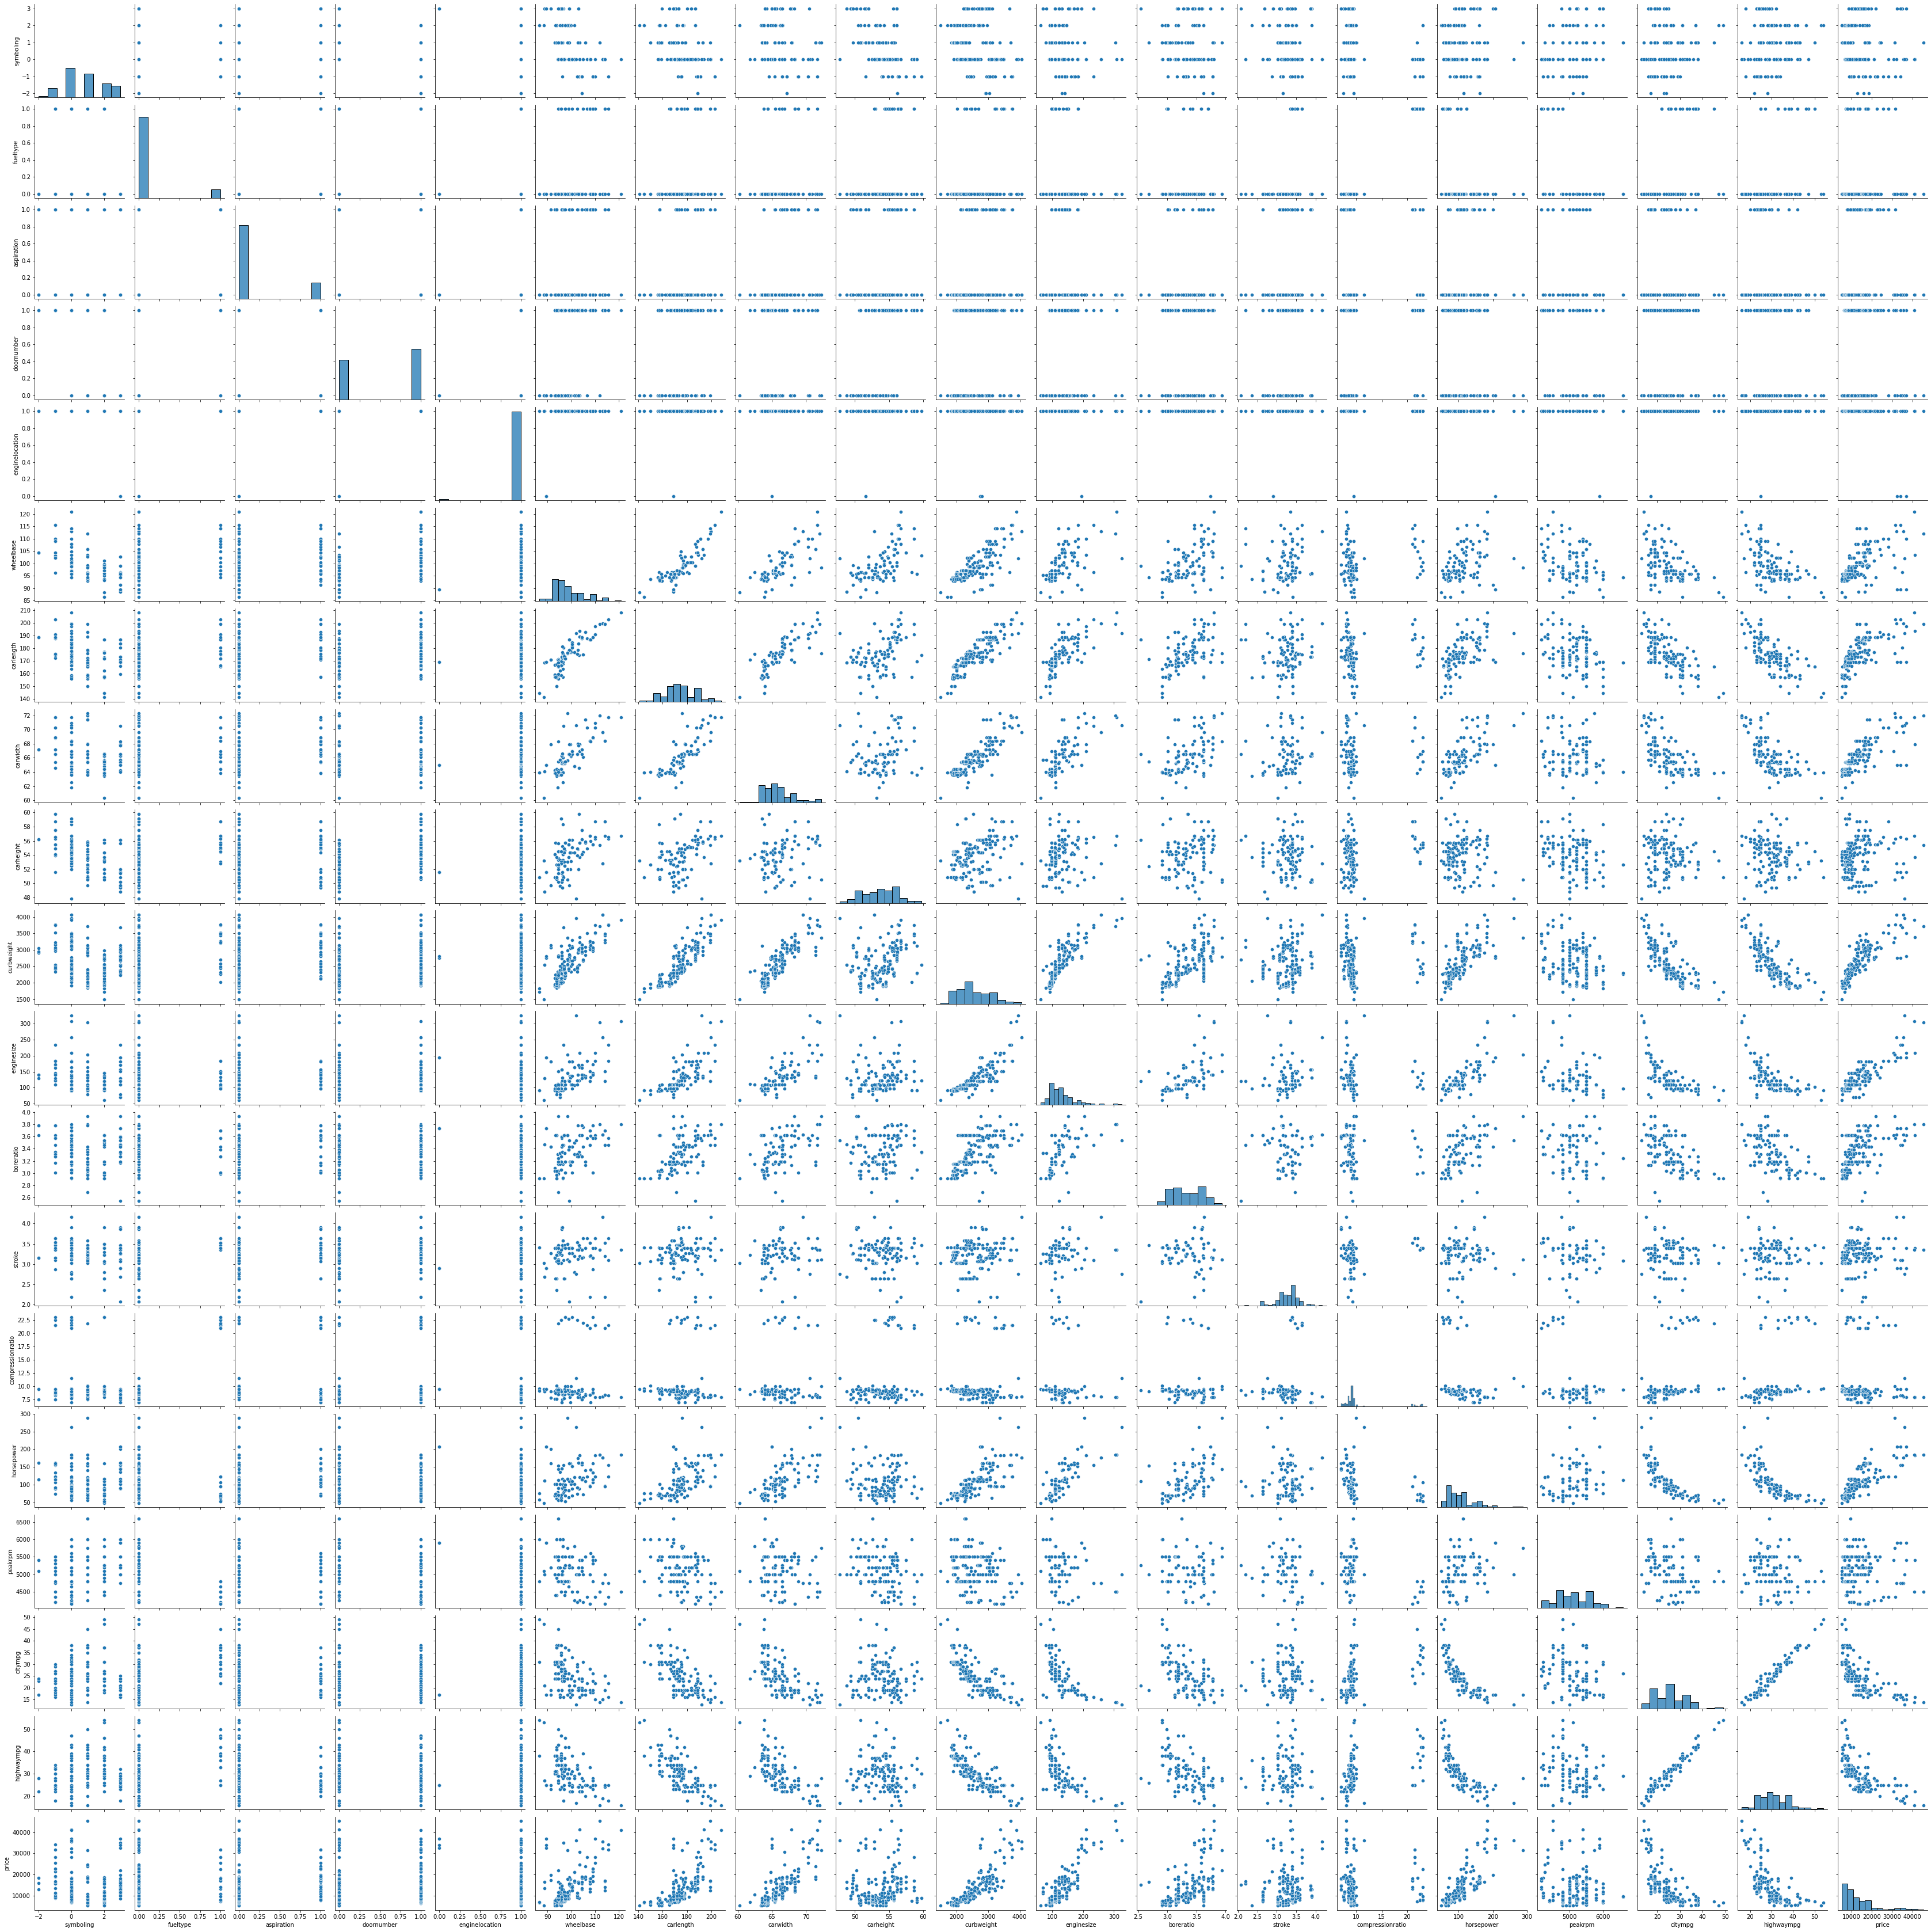

In [460]:
pairlot = sns.pairplot(auto_price[num_cols])

### carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.

### carheight doesn't show any significant trend with price.

### citympg , highwaympg - seem to have a significant negative correlation with price.

### Visualising few more Categorical Variables

### Boxplot of all the categorical variables

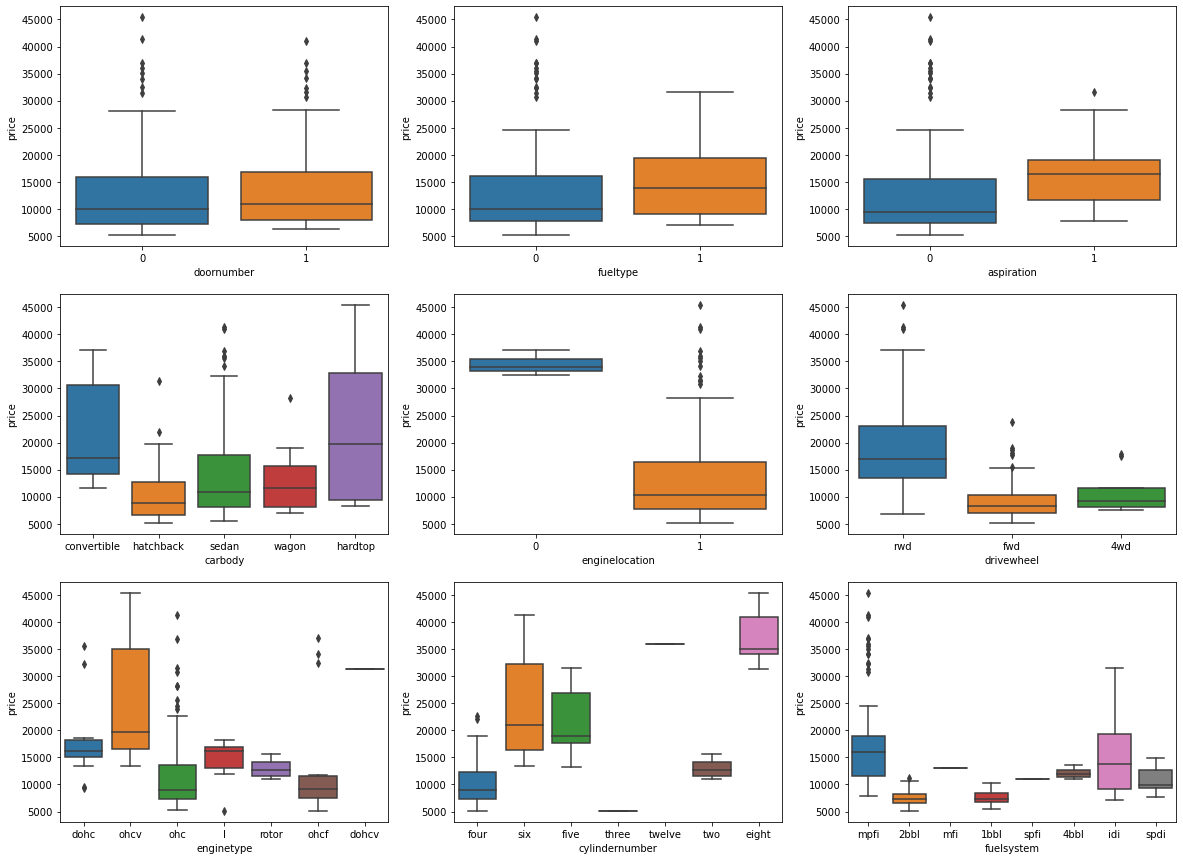

In [461]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = auto_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = auto_price)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = auto_price)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = auto_price)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto_price)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_price)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = auto_price)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto_price)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_price)
plt.show()

### The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.

### All the types of carbody is relatively cheaper as compared to convertible carbody.

### The cars with rear enginelocation are way expensive than cars with front enginelocation.

### The price of car is directly proportional to no. of cylinders in most cases.

### Enginetype ohcv comes into higher price range cars.

### DoorNumber isn't affecting the price much.

### HigerEnd cars seems to have rwd drivewheel

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

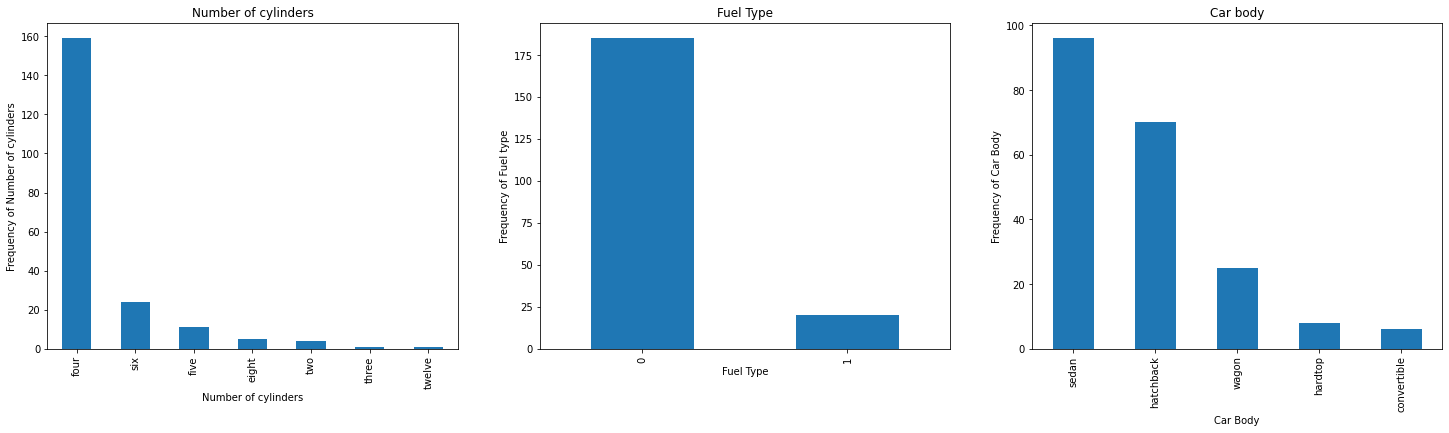

In [462]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = auto_price['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = auto_price['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = auto_price['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

### The number of cylinders used in most cars is four.

### Number of Gas fueled cars are way more than diesel fueled cars.

### Sedan is the most prefered car type.

## Relationship between fuelsystem vs price with hue fueltype

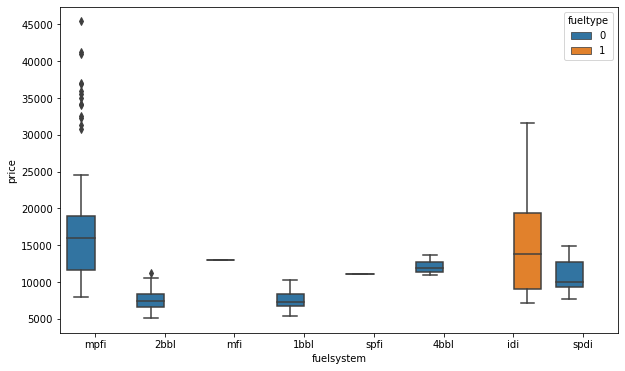

In [463]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = auto_price)
plt.show()

## Relationship between carbody vs price with hue enginelocation

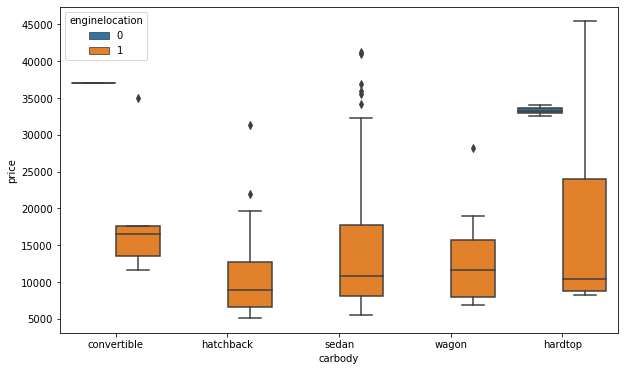

In [464]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = auto_price)
plt.show()

## Relationship between cylindernumber vs price with hue fueltype

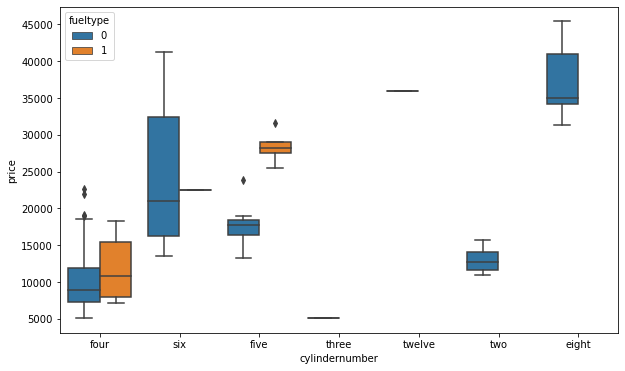

In [465]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = auto_price)
plt.show()

### check correlation

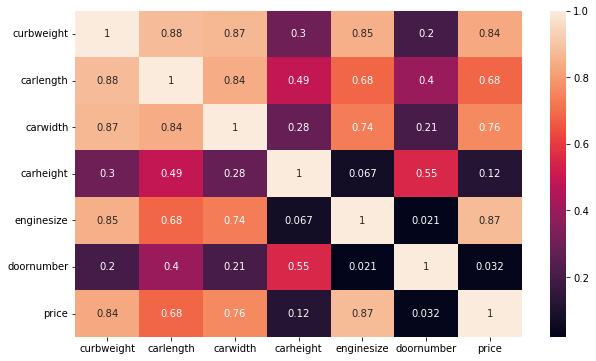

In [466]:
plt.figure(figsize = (10, 6))
sns.heatmap(auto_price[['curbweight','carlength','carwidth','carheight','enginesize','doornumber','price']].corr(), annot = True)
plt.show()

### curbweight has multicollinearity with carlength, carwidth, engine size,

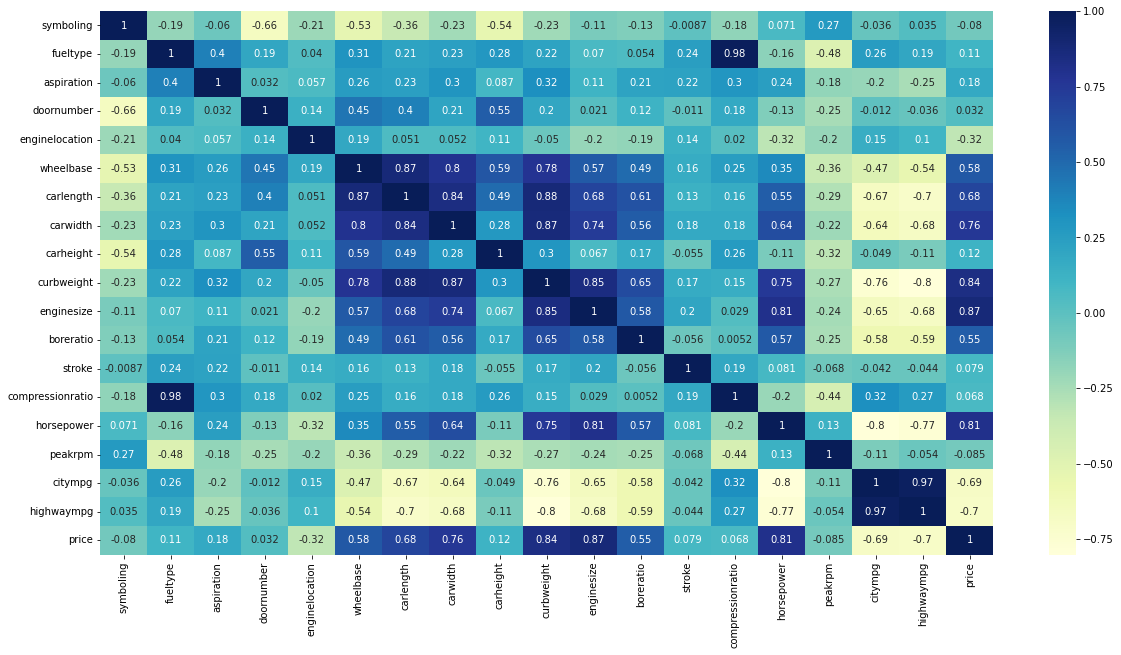

In [467]:
plt.figure(figsize = (20, 10))
sns.heatmap(auto_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Now we can get clear idea of curb weight is having multi collinearity with most of other variables

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

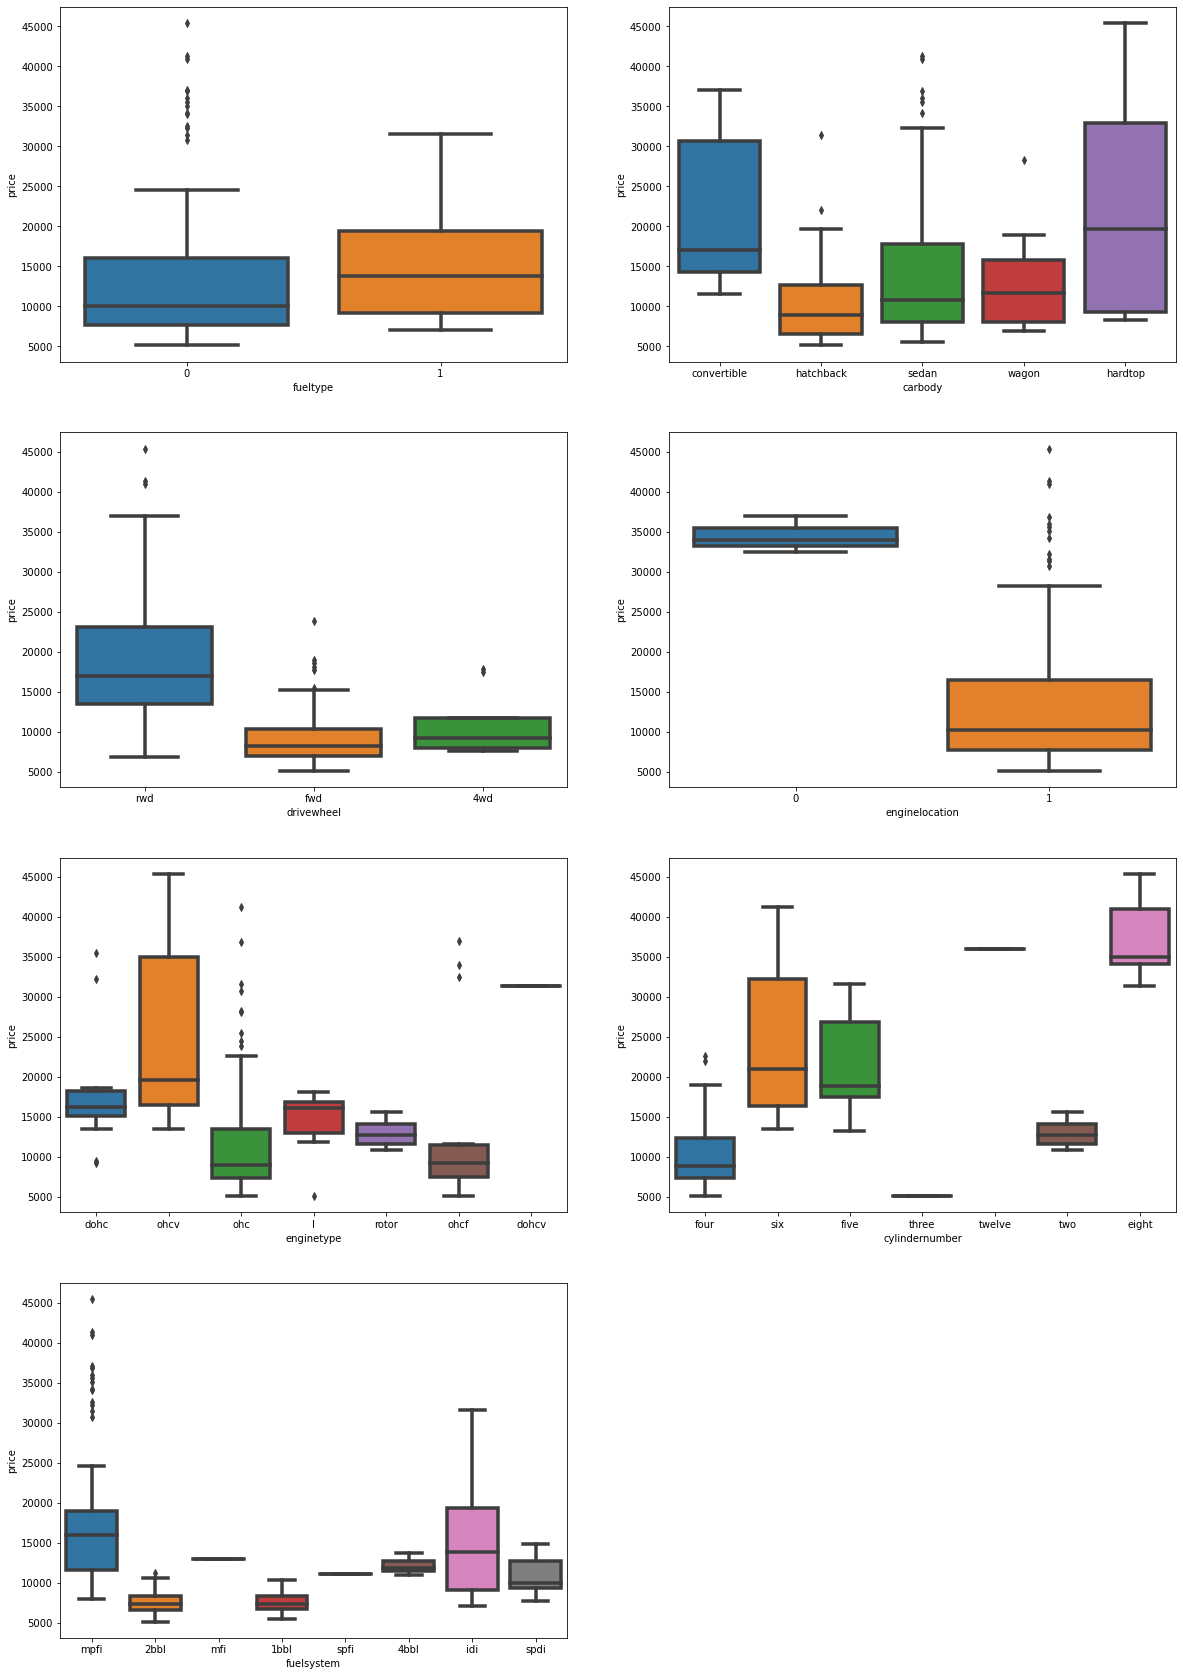

In [468]:
#Plotting sub plots with box plots to get inferences 
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto_price, linewidth=3.5)
plt.subplot(4,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = auto_price, linewidth=3.5)
plt.subplot(4,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_price, linewidth=3.5)
plt.subplot(4,2,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto_price, linewidth=3.5)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto_price, linewidth=3.5)
plt.subplot(4,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto_price, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_price, linewidth=3.5)



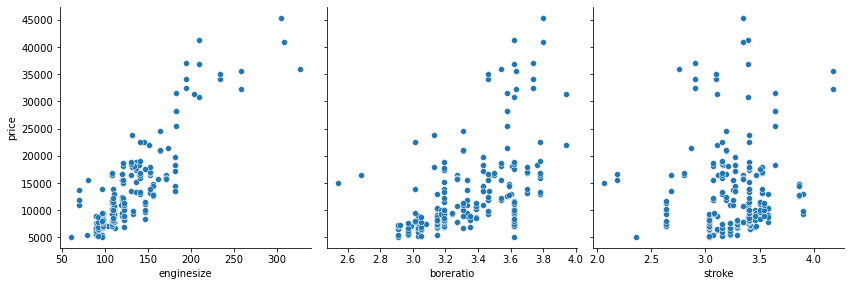

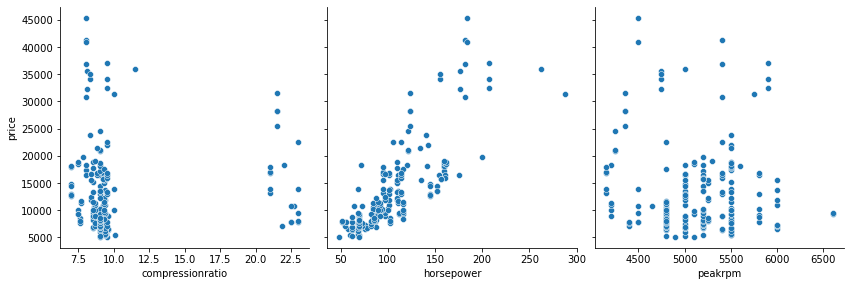

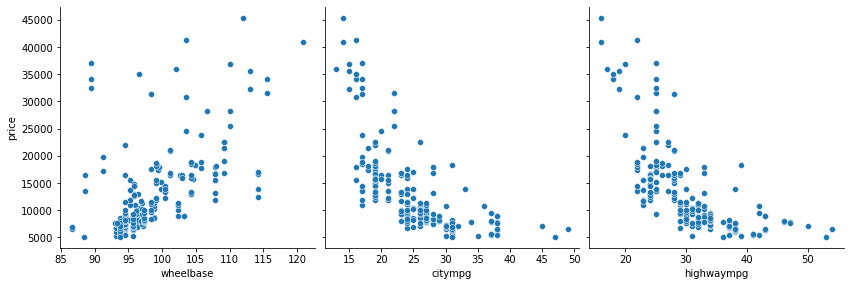

In [469]:
def visual(x,y,z):
    sns.pairplot(auto_price, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

visual('enginesize', 'boreratio', 'stroke')
visual('compressionratio', 'horsepower', 'peakrpm')
visual('wheelbase', 'citympg', 'highwaympg')

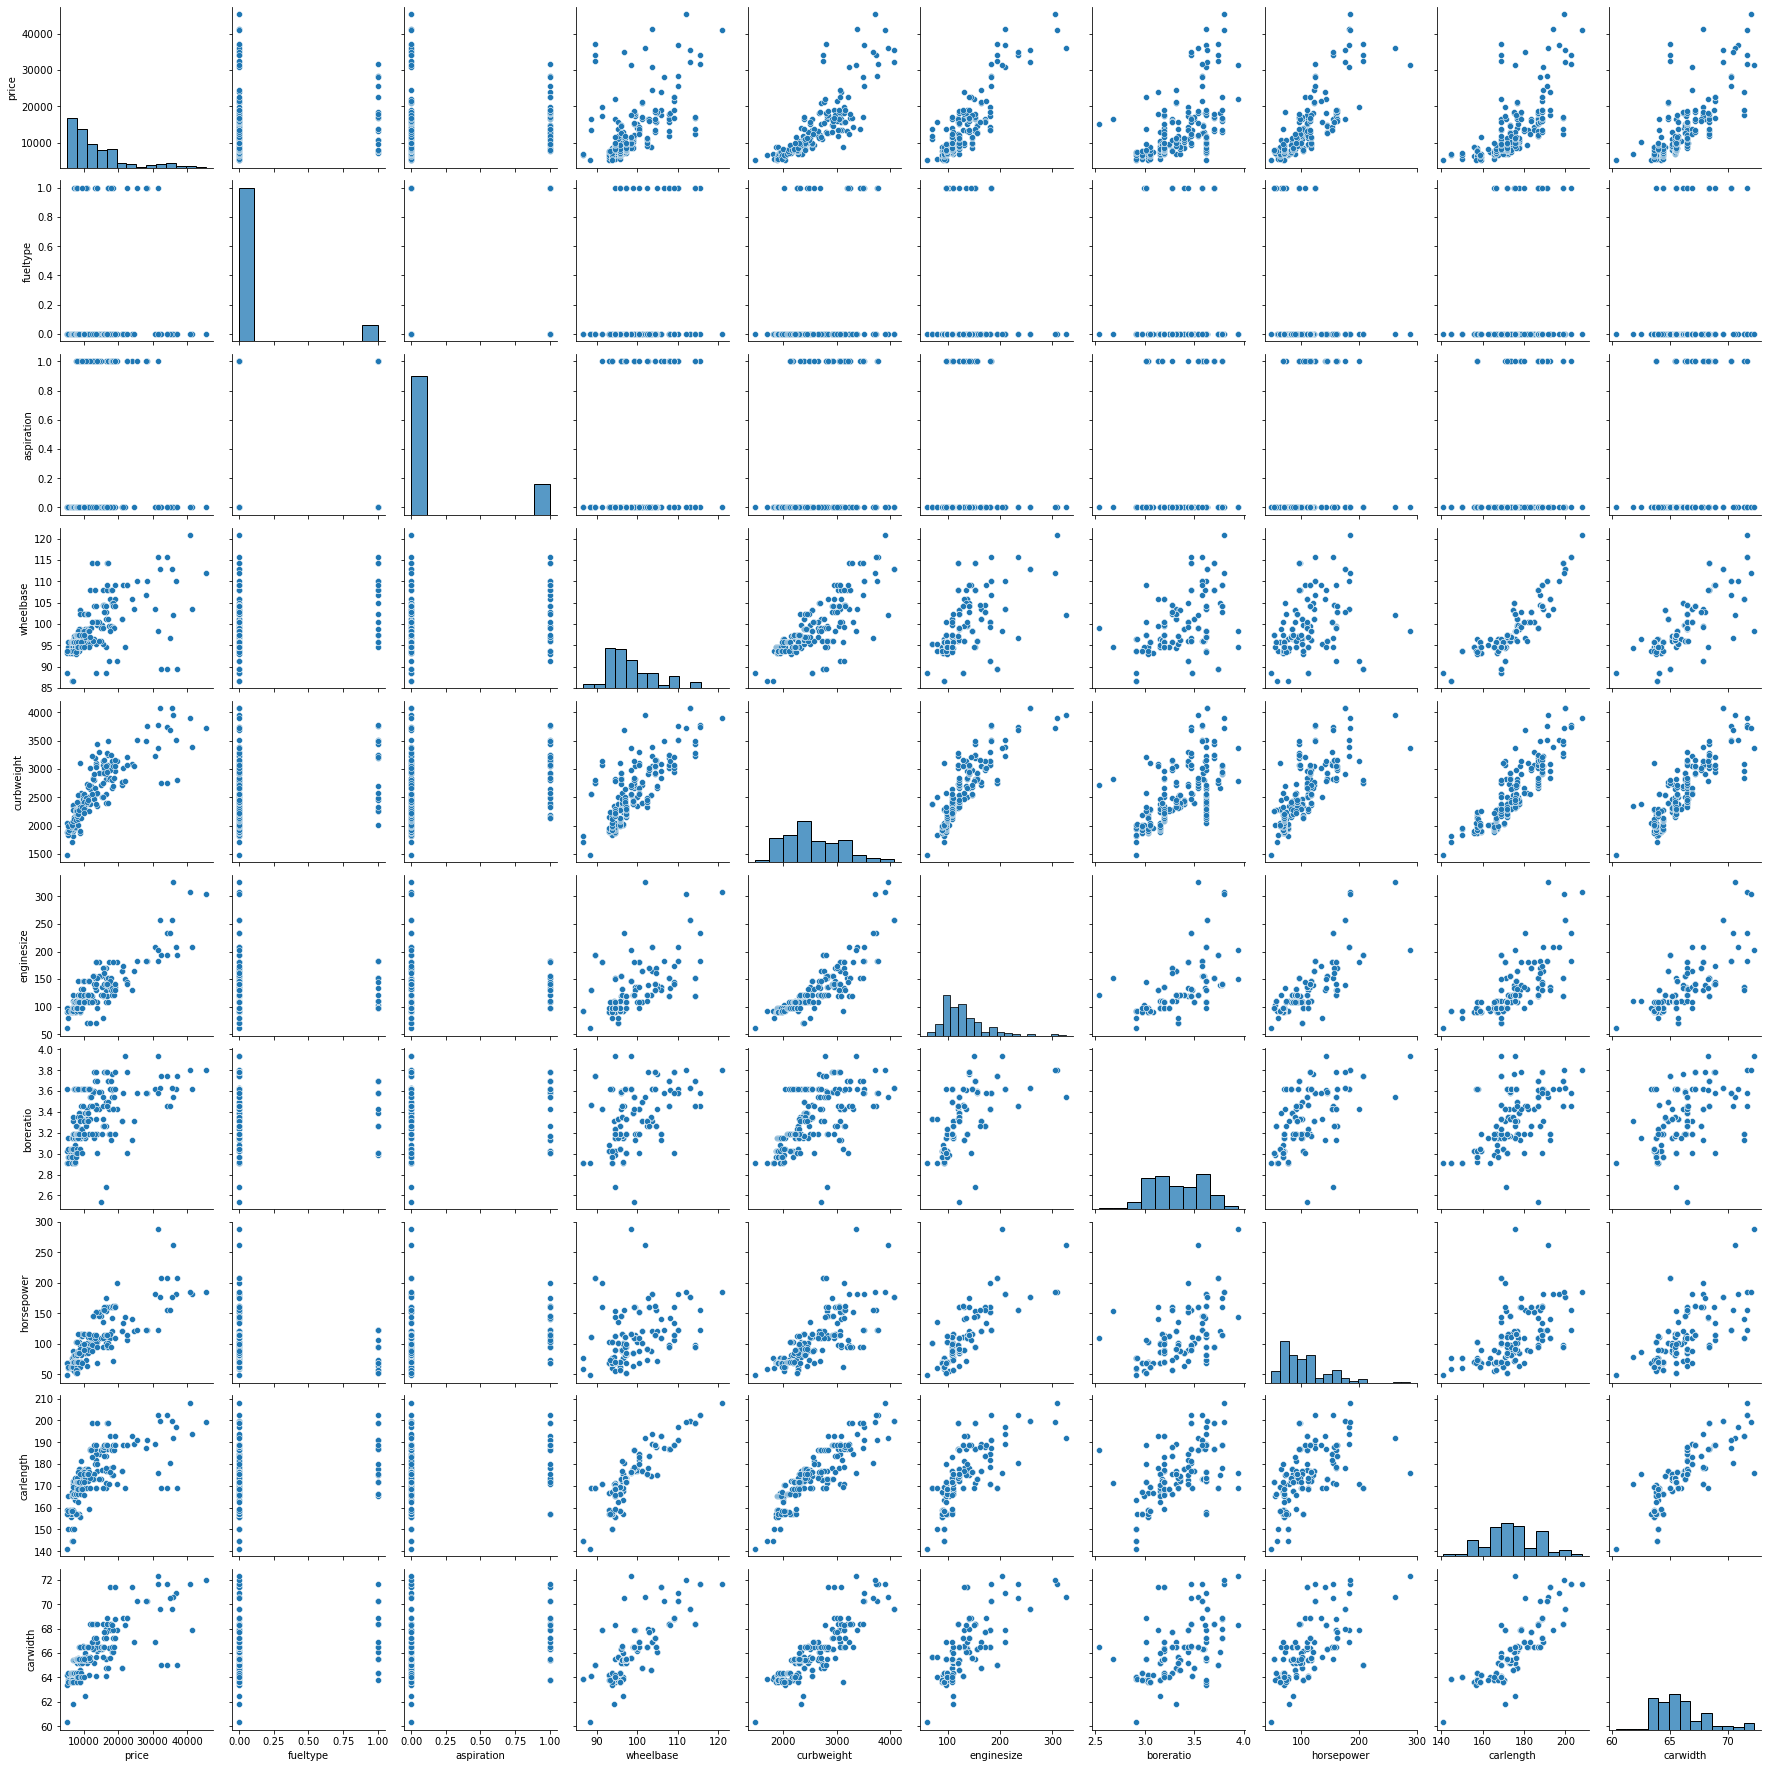

In [470]:
cars = auto_price[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
sns.pairplot(cars)

# SIMPLE LINEAR REGRESSION MODEL

## Perform train test split
## Build model using best variable and report the R2

### Now we are going to check correlation between price column and all other, so that we can choose best attribute which best fits for SIMPLE LINEAR REGRESSION.We have got Engine size is mostly influencing i.e. having high correlatin compared to others , so we will select this as our main feature.Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth

In [471]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [472]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(auto_price,train_size=0.7,random_state=100)

In [473]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[_vars] = scaler.fit_transform(df_train[_vars])

In [474]:
elem=[ 'curbweight', 'enginesize', 'horsepower','carwidth']
res=[]
for i in elem:
    print(i.upper())
    x=auto_price[i]
    y=auto_price['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)
    x_train = x_train[:,np.newaxis]
    x_test = x_test[:,np.newaxis]
    y_train=y_train[:,np.newaxis]
    y_test=y_test[:,np.newaxis]
    print('EQUATION')
    modelll=LinearRegression()
    modelll.fit(x_train,y_train)
    print(str(modelll.intercept_),'+',str(modelll.coef_),'*',i)
    y_train_pred=modelll.predict(x_train)
    y_test_pred = modelll.predict(x_test)
    
    print('{} got r2 score for:\ntrain data as :{} and \nfor test data as:{}'.format(i,round(r2_score(y_train,y_train_pred),3),round(r2_score(y_test, y_test_pred),3)))
    print('_'*50)
    res.append(r2_score(y_train,y_train_pred))

CURBWEIGHT
EQUATION
[-18316.5700889] + [[12.35392314]] * curbweight
curbweight got r2 score for:
train data as :0.743 and 
for test data as:0.604
__________________________________________________
ENGINESIZE
EQUATION
[-7607.86224311] + [[165.36918506]] * enginesize
enginesize got r2 score for:
train data as :0.753 and 
for test data as:0.784
__________________________________________________
HORSEPOWER
EQUATION
[-3192.65056523] + [[158.44573459]] * horsepower
horsepower got r2 score for:
train data as :0.65 and 
for test data as:0.656
__________________________________________________
CARWIDTH
EQUATION
[-172515.03928626] + [[2818.52643997]] * carwidth
carwidth got r2 score for:
train data as :0.639 and 
for test data as:0.45
__________________________________________________


# MULTIPLE LINEAR REGRESSION

## Make a multiple regression model, Apply feature selection approaches discussed in the class
## Final model should be interpretable, What is your understanding of the factors that drive price?

## Creating dummy variables

In [475]:
lst=['carbody','drivewheel','enginetype','cylindernumber','fuelsystem']
for i in lst:
    dummy=pd.get_dummies(auto_price[i],drop_first=True)
    auto_price=pd.concat([auto_price,dummy],axis=1)
    auto_price.drop([i],axis=1,inplace=True)

In [476]:
dummy = pd.get_dummies(auto_price['brand'], drop_first = True)
auto_price = pd.concat([auto_price, dummy], axis = 1)
auto_price.drop(['brand'], axis = 1, inplace = True)

In [477]:
auto_price.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'model', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [478]:
cols=list(auto_price.columns)
len(cols)


66

In [479]:
auto_price = auto_price.drop(columns=['model'])

In [480]:
x_train.shape

(143, 1)

In [481]:
auto_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,0,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


### train test split and feature scaling

In [482]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(auto_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [483]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [484]:
y_train = df_train.pop('price')
X_train = df_train

In [485]:
X_train.shape

(143, 64)

# RFE

In [486]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [487]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('fueltype', False, 39),
 ('aspiration', False, 21),
 ('doornumber', False, 47),
 ('enginelocation', True, 1),
 ('wheelbase', False, 14),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 42),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 5),
 ('compressionratio', False, 44),
 ('horsepower', False, 11),
 ('peakrpm', False, 52),
 ('citympg', False, 49),
 ('highwaympg', False, 50),
 ('hardtop', False, 17),
 ('hatchback', False, 15),
 ('sedan', False, 18),
 ('wagon', False, 16),
 ('fwd', False, 48),
 ('rwd', False, 24),
 ('dohcv', False, 36),
 ('l', False, 7),
 ('ohc', False, 43),
 ('ohcf', False, 12),
 ('ohcv', False, 22),
 ('rotor', True, 1),
 ('five', False, 3),
 ('four', False, 4),
 ('six', False, 31),
 ('three', True, 1),
 ('twelve', False, 2),
 ('two', True, 1),
 ('2bbl', False, 40),
 ('4bbl', False, 26),
 ('idi', False, 38),
 ('mfi', False, 54),
 ('mpfi', False, 29),
 ('spdi', False,

In [488]:
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'three', 'two', 'bmw', 'porsche'],
      dtype='object')

In [489]:
X_train_rfe = X_train[rfe_]

In [490]:
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [491]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.18e-65
Time:                        19:48:50   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [492]:
X_train_new = X_train_rfe.drop(["three"], axis = 1)

In [493]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           2.55e-65
Time:                        19:48:50   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1755      0.085      2.

In [494]:
checkVIF(X_train_new)

,Features,VIF
6,rotor,inf
7,two,inf
0,const,228.54
3,curbweight,8.62
4,enginesize,5.13
2,carwidth,4.80
5,boreratio,1.85
9,porsche,1.80
1,enginelocation,1.65
8,bmw,1.09


In [495]:
X_train_new = X_train_new.drop(columns=['rotor','two'])

In [496]:
checkVIF(X_train_new)

,Features,VIF
0,const,227.47
3,curbweight,8.35
2,carwidth,4.78
4,enginesize,4.42
5,boreratio,1.84
7,porsche,1.80
1,enginelocation,1.64
6,bmw,1.09


In [509]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     166.7
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           3.39e-63
Time:                        19:52:54   Log-Likelihood:                 178.98
No. Observations:                 143   AIC:                            -342.0
Df Residuals:                     135   BIC:                            -318.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1987      0.090      2.

In [510]:
lm = sm.OLS(y_train, X_train_new).fit()

In [511]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'bmw', 'porsche'],
      dtype='object')

In [512]:
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [513]:
y_test = df_test['price']
X_test = df_test
X_train_new = X_train_new.drop('const',axis=1)

In [514]:
X_test_new = X_test[X_train_new.columns]

In [515]:
X_test_new = sm.add_constant(X_test_new)

In [516]:
X_test_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'bmw', 'porsche'],
      dtype='object')

In [517]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

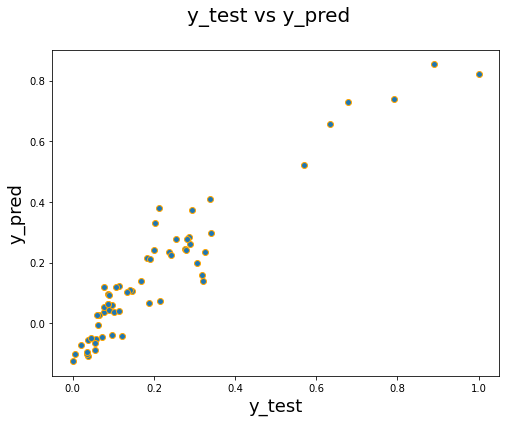

In [518]:
# Plotting y_test and y_pred to know the spread.
fig = plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred, edgecolor = 'orange')
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18)

In [526]:
print(round(r2_score(y_test, y_pred),2))

0.83


## Test accusacy = 83%

### It has been observed that below ones are representing most of the features of the car. As there is change in them it is observed that there is noticable change in the price linearly.
### It was noted that engine location, carwidth , engine size and companies like bmw area affecting the price of the car.